# 1.1 介绍

我们将介绍两个问题：数据拟合的最小二乘和一个线性规划问题。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
if not os.path.exists("assets"):
    os.mkdir("assets")

### 最小二乘问题

我们考虑函数$S(x) = 3 x^2 + 2 x + 1$，并对于函数在一些节点的数据做扰动。

我们的目标是通过最小二乘方法，基于数据点来反向推算出多项式函数的系数。


In [2]:
noise_level = 0.1
ℓ = 10
x = np.linspace(0,1,ℓ+1)

exact_c = [1, 2, 3]
y = np.zeros(len(x))
for j in range(len(exact_c)):
    y += exact_c[j] * x ** j
y += noise_level * np.random.randn(ℓ+1)

q =  1   det(A^T A) = 1.21E+01
[0.48 5.05]

q =  2   det(A^T A) = 1.04E+00
[0.88 2.44 2.61]

q =  5   det(A^T A) = 6.59E-11
[  0.98  -2.58  33.79 -67.5   59.28 -17.97]

q = 12   det(A^T A) = -1.34E-81
[ 1.02000000e+00 -1.00410000e+02  3.00640000e+03 -3.77252000e+04
  2.58562150e+05 -1.05435092e+06  2.63166124e+06 -3.91141365e+06
  2.92126669e+06  8.33066100e+04 -2.01392194e+06  1.48283443e+06
 -3.63120390e+05]



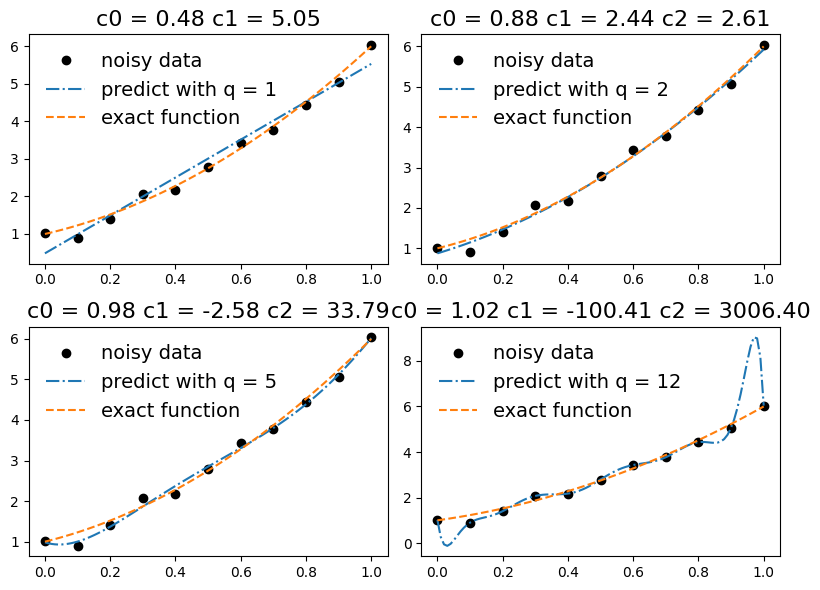

In [3]:
q_list = [1,2,5,12]

fig = plt.figure(figsize=(8, 6))

for q_idx in range(len(q_list)):
    plt.subplot(2,2, q_idx+1)

    q = q_list[q_idx]
    
    A = np.zeros((ℓ+1,q+1))
    for i in range(ℓ+1):
        for j in range(q+1):
            A[i,j] = x[i]**j

    c = np.linalg.solve(np.matmul(A.T, A), np.matmul(A.T, y))
    
    print("q = {:2d}   det(A^T A) = {:5.2E}".format(q, np.linalg.det(np.matmul(A.T, A))))
    
    if q >= 2:
        title = "c0 = {:4.2f} c1 = {:4.2f} c2 = {:4.2f}".format(c[0], c[1], c[2])
    elif q == 1:
        title = "c0 = {:4.2f} c1 = {:4.2f}".format(c[0], c[1])
    
    print(np.array([round(item, 2) for item in c]))
    print()

    # 画图部分
     
    plt.plot(x, y, 'ko', label="noisy data")

    x_more_grid = np.linspace(0,1,100)
    pred = np.zeros(len(x_more_grid))
    for j in range(q+1):
        pred += c[j] * x_more_grid ** j
    exact_y = np.zeros(len(x_more_grid))
    for j in range(len(exact_c)):
        exact_y += exact_c[j] * x_more_grid ** j
    plt.plot(x_more_grid, pred, '-.', label="predict with q = {:d}".format(q))
    plt.plot(x_more_grid, exact_y, '--', label="exact function")
    plt.title(title, fontsize=16)
    plt.legend(fontsize=14,frameon=False)
    
plt.tight_layout()
fig.savefig("assets/chp1_regression.pdf")
plt.show()

### 线性规划

具体问题见讲义

In [4]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 2, 3])
X,Y = np.meshgrid(x,y)

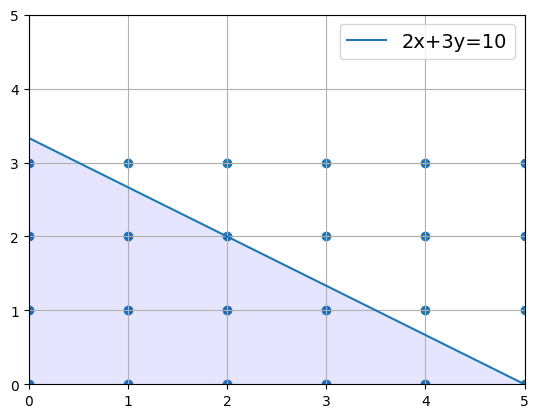

In [5]:
plt.scatter(X,Y)
plt.plot(x, (10-2*x)/3,label="2x+3y=10")
plt.fill_between(x, (10-2*x)/3, color='blue',alpha=0.1,edgecolor='none')
plt.legend(fontsize=14)
plt.xlim([0,5])
plt.ylim([0,5])
plt.grid(True)
plt.savefig("assets/chp1_lp_grid.pdf")

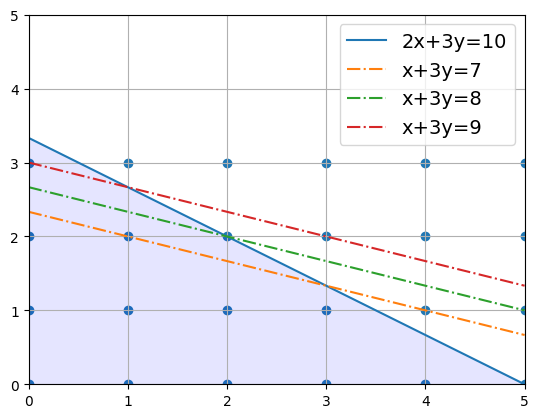

In [6]:
plt.scatter(X,Y)
x_ext = np.linspace(0, 5, 100)
plt.plot(x, (10-2*x)/3,label="2x+3y=10")
plt.fill_between(x, (10-2*x)/3, color='blue',alpha=0.1,edgecolor='none')
plt.plot(x_ext, (7-x_ext)/3, '-.', label="x+3y=7")
plt.plot(x_ext, (8-x_ext)/3, '-.', label="x+3y=8")
plt.plot(x_ext, (9-x_ext)/3, '-.', label="x+3y=9")
plt.legend(fontsize=14)
plt.xlim([0,5])
plt.ylim([0,5])
plt.grid(True)
plt.savefig("assets/chp1_lp_soln.pdf")